# The study of K-pop lyrics
This jupyter notebook is the final project of DTU course 02895 Social graph & Interactions 2022 from Cheng-Liang Lu(s220034@student.dtu.dk) & Xueying Chen(s216410@student.dtu.dk).


The project can divide into three parts:  song data from Melon (Korean platform), song data from Spotify (international platform), and the comprehensive analysis.


Dependencies for this project

In [1]:
# generals
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import warnings
import random
import os, re, time
import json, urllib3
from tqdm import tqdm
from pathlib import Path
from itertools import groupby, chain

# Web scraping APIs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Translators
from googletrans import Translator
import translators.server as tss
import translators as ts
ts.google

# NLP APIs
import ast
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

# better graph maker
from fa2 import ForceAtlas2

# platform APIs
import cred     #spotify developer account
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from melonapi import scrapeMelon

## I. Data from Melon
The current top 100 songs on Melon (The top 1 entertainment stream platform in Korea)

In [ ]:
#Used the Melon api tool to search current top 100 songs on Melon platform
rank = scrapeMelon.getList("LIVE").decode()

In [ ]:
rank_dict = ast.literal_eval(rank) # Make this "string" -> "dict"

### Build the dataset

In [ ]:
mother_dir = Path("Rank_eachArtist")

In [ ]:
#The groups we interested in (Which are in TOP 100 in Melon)
group_name = []
for name in list(mother_dir.glob("*.csv")):
    name = str(name)
    name = name.replace("Rank_eachArtist/", "")
    name = name.replace(".csv", "")
    group_name.append(name)
print(group_name)

### Build the each group's dataframe

In [ ]:
#Each groups' dataframe
Le_Sserafim_df = pd.read_csv("Rank_eachArtist/" + "Le_Sserafim" + ".csv")
if 'Unnamed: 0' in Le_Sserafim_df:
    Le_Sserafim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Le_Sserafim_df['group'] = 'Le_Sserafim'
Le_Sserafim_df['group_wiki'] = 'le-sserafim'

Girls_Generation_df = pd.read_csv("Rank_eachArtist/" + "Girls-Generation" + ".csv")
if 'Unnamed: 0' in Girls_Generation_df:
    Girls_Generation_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Girls_Generation_df['group'] = 'Girls-Generation'
Girls_Generation_df['group_wiki'] = 'girls-generation'

BTS_df = pd.read_csv("Rank_eachArtist/" + "BTS" + ".csv")
if 'Unnamed: 0' in BTS_df:
    BTS_df.drop(['Unnamed: 0'], axis=1, inplace=True)
BTS_df['group'] = 'BTS'
BTS_df['group_wiki'] = 'bts'

ITZY_df = pd.read_csv("Rank_eachArtist/" + "ITZY" + ".csv")
if 'Unnamed: 0' in ITZY_df:
    ITZY_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ITZY_df['group'] = 'ITZY'
ITZY_df['group_wiki'] = 'itzy'

G_IDLE_df = pd.read_csv("Rank_eachArtist/" + "(G)-IDLE" + ".csv")
if 'Unnamed: 0' in G_IDLE_df:
    G_IDLE_df.drop(['Unnamed: 0'], axis=1, inplace=True)
G_IDLE_df['group'] = '(G)-IDLE'
G_IDLE_df['group_wiki'] = 'g-i-dle'

Red_Velvet_df = pd.read_csv("Rank_eachArtist/" + "Red_Velvet" + ".csv")
if 'Unnamed: 0' in Red_Velvet_df:
    Red_Velvet_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Red_Velvet_df['group_wiki'] = 'Red_Velvet'
Red_Velvet_df['group_wiki'] = 'redvelvet'

IU_df = pd.read_csv("Rank_eachArtist/" + "IU" + ".csv")
if 'Unnamed: 0' in IU_df:
    IU_df.drop(['Unnamed: 0'], axis=1, inplace=True)
IU_df['group'] = 'IU'
IU_df['group_wiki'] = 'i-u'

Twice_df = pd.read_csv("Rank_eachArtist/" + "Twice" + ".csv")
if 'Unnamed: 0' in Twice_df:
    Twice_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Twice_df['group'] = 'Twice'
Twice_df['group_wiki'] = 'twice'

Aespa_df = pd.read_csv("Rank_eachArtist/" + "Aespa" + ".csv")
if 'Unnamed: 0' in Aespa_df:
    Aespa_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Aespa_df['group'] = 'Aespa'
Aespa_df['group_wiki'] = 'aespa'

Ive_df = pd.read_csv("Rank_eachArtist/" + "Ive" + ".csv")
if 'Unnamed: 0' in Ive_df:
    Ive_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Ive_df['group'] = 'Ive'
Ive_df['group_wiki'] = 'ive'

BLACKPINK_df = pd.read_csv("Rank_eachArtist/" + "BLACKPINK" + ".csv")
if 'Unnamed: 0' in BLACKPINK_df:
    BLACKPINK_df.drop(['Unnamed: 0'], axis=1, inplace=True)
BLACKPINK_df['group'] = 'BLACKPINK'
BLACKPINK_df['group_wiki'] = 'black-pink'

Bigbang_df = pd.read_csv("Rank_eachArtist/" + "Bigbang" + ".csv")
if 'Unnamed: 0' in Bigbang_df:
    Bigbang_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Bigbang_df['group'] = 'Bigbang'
Bigbang_df['group_wiki'] = 'bigbangkpop'

NewJeans_df = pd.read_csv("Rank_eachArtist/" + "NewJeans" + ".csv")
if 'Unnamed: 0' in NewJeans_df:
    NewJeans_df.drop(['Unnamed: 0'], axis=1, inplace=True)
NewJeans_df['group'] = 'NewJeans'
NewJeans_df['group_wiki'] = 'newjeans'

NMIXX_df = pd.read_csv("Rank_eachArtist/" + "NMIXX" + ".csv")
if 'Unnamed: 0' in NMIXX_df:
    NMIXX_df.drop(['Unnamed: 0'], axis=1, inplace=True)
NMIXX_df['group'] = 'NMIXX'
NMIXX_df['group_wiki'] = 'nmixx'

**The combination of dataframes**

In [ ]:
#Combine all the dataframes
frames = [Le_Sserafim_df, Girls_Generation_df, BTS_df, ITZY_df,
          G_IDLE_df, Red_Velvet_df, IU_df, Twice_df, Aespa_df,
          Ive_df, BLACKPINK_df, Bigbang_df, NewJeans_df, NMIXX_df]

all_df = pd.concat(frames)
all_df.fillna(0)
#all_df.song.combine_first(all_df.Song)
#all_df.resource.combine_first(all_df.Resourse)
#all_df.drop(['Song', 'Resourse'], axis=1, inplace=True)
all_df.reset_index(inplace=True)
all_df.drop(['index'], axis=1, inplace=True)
all_df[:10]

### Wikipage Scraping
Scrape our data from the three kind of websites(Wiki, Wiki kpop fandom, and Wiki kpop fandom) for each group

In [ ]:
http = urllib3.PoolManager()
baseurl = "https://" + "aespa" + ".fandom.com/api.php?"
action = "action=query"
title = "titles=" + "Illusion#Lyrics"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)

In [ ]:
http = urllib3.PoolManager()

#Different kind of wiki websites that we can scrape
def wiki_scr(text):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles=" + text
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
    wiki_bf(text, query)

def wiki_kpop_scr(text):
    baseurl = "https://kpop.fandom.com/api.php?"
    action = "action=query"
    title = "titles=" + text
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
    wiki_bf(text, query)

def wiki_scr_kpopEach(gname, text):
    baseurl = "https://" + gname + ".fandom.com/api.php?"
    action = "action=query"
    title = "titles=" + text
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
    wiki_bf(text, query)

def wiki_bf(text, query):
    wikiresource = http.request('GET', query)
    wikijson = json.loads(wikiresource.data.decode('utf-8'))

    if re.search(r'/', text):
        text = text.replace("/", "\\")

    with open('/Users/luchengliang/Social_Graph_and_Networks/Final_Project/jsonWebpage/' + text + '.txt', 'w') as f:
        f.write(str(wikijson))

In [ ]:
for i in range(len(all_df)):
    x = all_df.iloc[i, :]

    #Scrape different kind of wiki pages
    #First is the normal wiki
    if x['resource'] == 'Wiki':
        q = wiki_scr(x['song'])

    if x['resource'] == 'Wiki_f':
        #Second one is from Kpop fandom page, not their own page
        if '//kpop.fandom' in str(x['Web']):
            q = wiki_kpop_scr(x['song'])
        elif type(x['group_wiki']) != float:
            #Third one is from each fandom wiki page
            q = wiki_scr_kpopEach(x['group_wiki'], x['song'])
        else:
            continue

The json files we have scraped from the wiki pages' content can be found via [this link to DTU drive](https://dtudk.sharepoint.com/:f:/s/socialgraph22/EnfrbqM0BRBAqeOSPw_atr8BA1Qv4unehE2niIVugiCVoQ?e=n6rRwD)


In [ ]:
# replace with the downloaded file path when needed
path = "/Users/luchengliang/Social_Graph_and_Networks/Final_Project/jsonWebpage"
dir_list = os.listdir(path)

### Find Lyrics

In [ ]:
#Add lyrics column for our lyrics from each song.
all_df['lyrics'] = pd.Series(dtype='str')

**The process for finding lyrics in json webpage text storing in the local folder or on their own wiki page**

In [ ]:
def kpop_eachfandom_lyrics(text, gname):
    if text == "POP/STARS":
        connections = CoolWayFindLyrics(text, gname)
    else:
        with open("./jsonWebpage/" + text + ".txt") as f:
            Aes = f.readlines()
            try:
                connections = re.findall(r'\|English = \\\\n<poem>(.*)\\\\n<\/poem>', str(Aes))
                connections = connections[0]
            except IndexError:
                try:
                    connections = re.findall(r'\|English=<poem>(.*)\\\\n<\/poem>', str(Aes))
                    connections = connections[0]
                except IndexError:
                    try:
                        connections = re.findall(r'English=\\\\n<poem>\\\\n(.*)\\\\n<\/poem>', str(Aes))
                        connections = connections[0]
                    except IndexError:
                        try:
                            connections = re.findall(r'English=\\\\n<poem>(.*)\\\\n<\/poem>', str(Aes))
                            connections = connections[0]
                        except IndexError:
                            try:
                                connections = re.findall(r'English=<poem>(.*)<\/poem>', str(Aes))
                                connections = connections[0]
                            except IndexError:
                                try:
                                    connections = re.findall(r'English\]\]\)\\\\n\|lyrics =<poem>(.*)<\/poem>', str(Aes))
                                    connections = connections[0]
                                except IndexError:
                                    try:
                                        connections = re.findall(r'English=\\\\n<poem>\\\\n(.*)<\/poem>', str(Aes))
                                        connections = connections[0]
                                    except IndexError:
                                        try:
                                            connections = re.findall(r'English=\\\\n<poem>(.*)<\/poem>', str(Aes))
                                            connections = connections[0]
                                        except IndexError:
                                            try:
                                                connections = re.findall(r'Translation=\\\\n<poem>\\\\n(.*)\\\\n<\/poem>', str(Aes))
                                                connections = connections[0]
                                            except IndexError:
                                                connections = annother(str(Aes))

            connections = connections.replace("\\\\n", ". ")
            connections = ''.join(char for char in connections if char.isalnum() or char.isspace())
            connections = connections.replace("ColorKarina", "")
            connections = connections.replace("ColorNingning", "")
            connections = connections.replace("ColorWinter", "")
            connections = connections.replace("ColorGiselle", "")
            connections = connections.replace("  ", " ")
            connections = connections.replace("   ", " ")

            # Remove annoying things
            #tokens = word_tokenize(connections.lower())
            #english_stopwords = stopwords.words('english')
            #tokens_wo_stopwords= [t for t in tokens if t not in english_stopwords]
            #connections = " ".join(tokens_wo_stopwords)
            connections = connections.lower()

            if connections == "nfind":
                connections = CoolWayFindLyrics(text, gname)

            connections = ' '.join(word for word in connections.split(' ') if not word.startswith(('color', 'lyrics')))


    return connections

def annother(t):
    try:
        connections = re.findall(r'Lyrics\\\\n\|content=\\\\n<poem>\\\\n(.*)\\\\n<\/poem>', t)
        connections = connections[0]
    except IndexError:
        try:
            connections = re.findall(r'eng=\\\\n<poem>\\\\n(.*)\\\\n<\/poem>', t)
            connections = connections[0]
        except IndexError:
            connections = "n_find"
    return connections

def CoolWayFindLyrics(song_name, gname):
    url = "https://" + gname + ".fandom.com/wiki/" + song_name
    req = urllib3.PoolManager()
    res = req.request('GET', url)
    soup = BeautifulSoup(res.data, 'html.parser')
    lyrics = soup.find_all('div', attrs={"class":"poem"})
    if len(lyrics) == 0:
        return "nfind"

    #Become the normal lyrics
    try:
        result = re.sub(r'\<(.*)\>', '', lyrics[-2].prettify())
    except IndexError:
        result = re.sub(r'\<(.*)\>', '', lyrics[-1].prettify())

    result = re.sub(r'\n', '', result)
    result = ' '.join(result.split())

    #Replace annoying words
    #tokens = word_tokenize(result.lower())
    #english_stopwords = stopwords.words('english')
    #tokens_wo_stopwords= [t for t in tokens if t not in english_stopwords]
    #result = " ".join(tokens_wo_stopwords)
    result = result.lower()
    result = ''.join(char for char in result if char.isalnum() or char.isspace())
    result = ' '.join(result.split())
    return result

In [ ]:
for i in tqdm(range(len(all_df))):
    x = all_df.iloc[i, :]

    if x['resource'] == 'Wiki_f':
        if '//kpop.fandom' not in str(x['Web']):
            #print(x['song'])
            lyrics = kpop_eachfandom_lyrics(x['song'], x['group_wiki'])
            all_df.loc[i, ['lyrics']] = lyrics
        else:
            continue

#### The Songs that have lyrics
**Original ver. without cleaning**

In [ ]:
#Get rid of the songs that cannot find lyrics in the json webpage files or on their kpop wiki fandom.
df_wLyrics = all_df[(all_df['lyrics'] != 'nfind') & (all_df['lyrics'].isna() == False)]
df_wLyrics = df_wLyrics.reset_index()
del df_wLyrics['index']

**Manual modify the lyrics part**

In [ ]:
df_wLyrics.drop(labels=[44, 27, 62, 72, 74, 76, 77, 78, 79, 114, 150, 151, 152, 153], axis=0, inplace=True)
df_wLyrics.drop(['Web', 'resource', 'group_wiki'], axis=1, inplace=True)

In [ ]:
df_wLyrics.loc[75:94, ['group']] = "Red Velvet"

In [ ]:
with open('missing.rtf', 'r') as file:
    text = file.read()
#Replace Stop words
result = text
result = ' '.join(word for word in result.split(' ') if not word.startswith('\\'))
#tokens = word_tokenize(result.lower())
#english_stopwords = stopwords.words('english')
#tokens_wo_stopwords= [t for t in tokens if t not in english_stopwords]
#result = " ".join(tokens_wo_stopwords)
result = result.lower()
result = ''.join(char for char in result if char.isalnum() or char.isspace())
result = ' '.join(result.split())

df_wLyrics.loc[157, ['lyrics']] = result

'''
with open('readme.txt', 'w') as f:
    f.write(result)
'''

In [ ]:
outputpath = 'Melon_Songs_wStop.csv'
df_wLyrics.to_csv(outputpath, sep=',', index=True, header=True)

In [ ]:
MelonSongs_df = pd.read_csv('Melon_Songs_wStop_final.csv', index_col=0)
MelonSongs_df = MelonSongs_df.reset_index()
MelonSongs_df.drop(['index'], axis=1, inplace=True)
#MelonSongs_df.drop([29], axis=0, inplace=True)
MelonSongs_df = MelonSongs_df.reset_index()

for i in range(len(MelonSongs_df)):
    text = MelonSongs_df.loc[i, ['song']].item()
    text2 = MelonSongs_df.loc[i, ['group']].item()

    #let the punctuation com back on our groups' names and songs' names
    text = text.replace("_", " ")
    text = text.replace("%27","'")
    text = text.replace("%26", "&")
    text2 = text2.replace("_", " ")

    MelonSongs_df.loc[i, ['song']] = text
    MelonSongs_df.loc[i, ['group']] = text2


In [ ]:
outputpath = 'MS_wStop.csv'
MelonSongs_df.to_csv(outputpath, sep=',', index=True, header=True)

In [ ]:
MelonSongs_df = pd.read_csv('MS_wStop_needmodify.csv', index_col=0)

#In the BTS's songs, they have added the singers who belongs to what part inside the lyrics,
# so we needed to remove them by manual way
for i in range(len(MelonSongs_df)):
    text = MelonSongs_df.loc[i, ['lyrics']].item()
    text = text.replace("jimin and v", "")
    text = text.replace("jimin and jungkook", "")
    text = text.replace("jimin and rm", "")
    text = text.replace("jimin and sugar", "")
    text = text.replace("jimin and jin", "")

    text = text.replace("v and jimin", "")
    text = text.replace("v and jin", "")
    text = text.replace("v and rm", "")
    text = text.replace("v and sugar", "")
    text = text.replace("v and junkook", "")

    text = text.replace("jin and jimin", "")
    text = text.replace("jin and rm", "")
    text = text.replace("jin and sugar", "")
    text = text.replace("jin and jungkook", "")
    text = text.replace("jin and v", "")

    text = text.replace("junkook and sugar", "")
    text = text.replace("junkook and jimin", "")
    text = text.replace("junkook and rm", "")
    text = text.replace("junkook and v", "")
    text = text.replace("junkook and jin", "")

    text = text.replace("sugar and rm", "")
    text = text.replace("sugar and jimin", "")
    text = text.replace("sugar and jungkook", "")
    text = text.replace("sugar and v", "")
    text = text.replace("sugar and jin", "")

    text = text.replace("v", "")
    text = text.replace("jungkook", "")
    text = text.replace("jimin", "")
    text = text.replace("rm", "")
    text = text.replace("suga", "")
    text = text.replace("jin", "")
    text = text.replace("jhope", "")

    MelonSongs_df.loc[i, ['lyrics']] = text

#output our new csv dataframe file but still it needed to be modified
outputpath = 'MS_modified.csv'
MelonSongs_df.to_csv(outputpath, sep=',', index=True, header=True)

In [ ]:
#Load the csv through manual modified
MelonSongs_df = pd.read_csv('MS_final.csv', index_col=0)
MelonSongs_df.drop(['index'], axis=1, inplace=True)
MelonSongs_df.loc[53:68, ['group']] = "(G)I-DLE"

#output the cleanest version of our dataframe
outputpath = 'MS_final.csv'
MelonSongs_df.to_csv(outputpath, sep=',', index=True, header=True)

 ### The correct dataframe after fixing

In [ ]:
#Check the complete dataframe we have. (Delete the song with empty or without english lyrics in the lyrics' field.)
MelonSongs_df = pd.read_csv('MS_final.csv', index_col=0)
MelonSongs_df[:10]

## II. Data from Spotify
We are using a .csv from Kaggle that contains the k-pop idols from 1992-2020 as the start point. 

Here is the link to it: [Kaggle: k-pop idols](https://www.kaggle.com/datasets/kimjihoo/kpopdb)

In [ ]:
# stating with load in the file
df_idols = pd.read_csv("./Dataset/kpop_idols.csv.xls")
df_group = df_idols.copy()
df_group.drop(columns=['Stage Name', 'Full Name', 'Korean Name', 'K. Stage Name',
                       'Date of Birth', 'Country', 'Birthplace',
                       'Other Group','Gender'], inplace=True)
df_group.dropna(inplace=True)
df_group.reset_index(drop=True, inplace=True)

In [ ]:
# setting up the spotipy API
# you can find the cred.py following the link:
# https://dtudk.sharepoint.com/:u:/s/socialgraph22/ESo6QgfribxAg9WuKQux8wgB7NLnzskxomoRGsNtwvjI3Q?e=klkt5O
# and place it in the same directory with this notebook
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID,
                                               client_secret=cred.client_SECRET,
                                               redirect_uri=cred.redirect_url),
                     requests_timeout=30)

In [ ]:
# to increase the accuracy of the fetching result
# target genres are defined and using as constrain
# only when none genre matches will return the most possible result
target_genres = ['k-pop','k-pop girl group','k-pop boy group','k-rock',
                 'korean pop','korean city pop']

def sp_fetcher(name):
    result = sp.search(q='artist:' + name, type='artist')
    items  = result['artists']['items']
    for i in items:
        if any(genre in i['genres'] for genre in target_genres):
            return [i['name'], i['genres'], i['uri'], i['popularity']]
    if len(items) > 0:
        i = items[0]
        return [i['name'], i['genres'], i['uri'], i['popularity']]

In [ ]:
# fill the info into dataframe
for idx, name in enumerate(df_group['Group']):
    result = sp_fetcher(name)
    try:
        df_group.at[idx,'spotify_name'] = str(result[0])
        df_group.at[idx,'genres']       = list(result[1])
        df_group.at[idx,'uri']          = str(result[2])
        df_group.at[idx,'popularity']   = int(result[3])
    except TypeError:
        df_group.at[idx,'spotify_name'] = pd.NaT
        df_group.at[idx,'genres']       = pd.NaT
        df_group.at[idx,'uri']          = pd.NaT
        df_group.at[idx,'popularity']   = pd.NaT

In [ ]:
# clear up the dataframe
df_group.dropna(inplace=True)
df_group.drop_duplicates(subset=['Group'], keep='last', inplace=True)

In [ ]:
# show the top 20 groups
top_groups = df_group.sort_values(by=['popularity'])[-20:]
top_groups.sort_values(by=['popularity'], ascending=False)

We noticed that some groups have different names, IM leads to Imagine Dragons, TOO leads to TOOL, ANS leads to Anson Seabra, DUSTIN leads to Dustin Lynch, which are all wrong links.

This inaccuracy happens in two forms:
1. The artist exists on Spotify, but the API cannot fetch
2. The artist does NOT exist on Spotify

Both will result in returning the most likely option. After analyzing them, an overview can now be presented (The contained data is collected on November 24th, 2023):
| Group         | exist on Spotify | monthly listeners |
| ------------- |:----------------:| -----------------:|
| IM            | NO               |                 / |
| TOO           | YES              |            31,203 |
| ANS           | YES              |            21,350 |
| DUSTIN        | NO               |                 / |

We have checked the monthly listeners of Monsta X and BigBang, which both have popularity at 64, the numbers are 2,341,918 and 2,868,384. Comparing them together, due to the significant difference, we should not consider keeping these groups.

There is one exception that comes to noticed: NCT leads to NCT DREAM, which is correct but not entirely. Since NCT has different subunits, such as NCT 127, NCT Dream, NCT U and WayV, which correspondingly have popularity at 71, 70, 63 and 58.

We therefore decide to drop the aforementioned wrong links and manually place NCT 127.

In [ ]:
# dropping the aforementioned wrong links
df_group.drop([994, 1062, 808, 908], inplace=True)

In [ ]:
# check the top 20 again
top_groups = df_group.sort_values(by=['popularity'])[-20:]
top_groups.sort_values(by=['popularity'], ascending=False, inplace=True)

We can tell that DIA leads Diana Krall is again a wrong link, so we repeat the previous process and get their monthly listeners number: 102,596, which indicates the removal of this group.

In [ ]:
df_group.drop([1089], inplace=True)

top_groups = df_group.sort_values(by=['popularity'])[-20:]
top_groups.sort_values(by=['popularity'], ascending=False, inplace=True)

### Gather the top songs for the groups
Now the international top 20 Korean groups are in, next step will be fetching the top 10 songs for all of them

In [ ]:
def song_fetcher(uri):
    song_list = []
    results   = sp.artist_top_tracks(uri)
    for track in results['tracks'][:10]:
        song = []
        song.append(track['name'])
        song.append(track['uri'])
        song.append(track['album']['name'])
        song.append(track['popularity'])
        song_list.append(song)
    return song_list

In [ ]:
top_groups['top10songs'] = top_groups.uri.apply(song_fetcher)

In [ ]:
df_track = pd.DataFrame(columns=['track', 'artists', 'uri', 'album_name', 'popularity'])
for idx, song_list in enumerate(top_groups['top10songs']):
    for s in song_list:
        df_song  = pd.DataFrame([[s[0], top_groups.at[idx, 'spotify_name'], s[1], s[2], s[3]]],
                                columns=['track', 'artists', 'uri', 'album_name', 'popularity'])
        df_track = pd.concat([df_song, df_track])

In [ ]:
# rank them by popularity
df_track.sort_values(by=['popularity'], ascending=False, inplace=True)
df_track.reset_index(drop=True, inplace=True)

We have noticed that Spotify API could fetch a special attribute of song: valence, which is used to describe if a song is likely to make people feel happy (higher valence) or sad (lower valence).
Let's add this to the dataframe for further investigation.

In [ ]:
def add_valence(uri):
    features = sp.audio_features(uri)
    valence  = features[0]['valence']
    return valence

df_track['valence'] = df_track.uri.apply(add_valence)

### Gather the lyrics for the songs
Lyrics are only visitable if you logged in and the song credits, which we originally want to build the edge of the network graph upon, are also hidden on Spotify, hence we need some extra help from Selenium to get them.

In [ ]:
# auto-login for spotify
chrome = webdriver.Chrome()
chrome.get('https://open.spotify.com/')
time.sleep(3)
chrome.find_element(By.ID, "onetrust-accept-btn-handler").click()
chrome.find_element(By.CSS_SELECTOR, ".jsmWVV").click()
time.sleep(2)
chrome.find_element(By.ID, "login-username").send_keys("luqiuyu2016@126.com")
chrome.find_element(By.ID, "login-password").send_keys("LQY894580056")
chrome.find_element(By.ID, "login-button").click()
time.sleep(1)

In [ ]:
def page_fetcher(browser, uri):
    baseurl = 'https://open.spotify.com/track/'
    browser.get(baseurl+uri)
    threshold = False
    composer, producer = [], []
    wait = WebDriverWait(browser, 20)

    prefix = 'Lyrics '
    try:
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,
                                                   "T0anrkk_QA4IAQL29get")))
        lyrics = browser.find_element(By. CLASS_NAME,
                                      "Q3OKWaFrTVTIRZyG05Gh").text.replace('\n', ' ')
        lyrics = lyrics.removeprefix(prefix)
    except NoSuchElementException:
        lyrics = 'Not Found'

    try:
        browser.find_element(By.CLASS_NAME, "T0anrkk_QA4IAQL29get").click()
        browser.find_element(By.XPATH, 
                                "//*[text()='Show credits']/parent::button").click()
        time.sleep(1)
    except NoSuchElementException:
        page_fetcher(browser, uri)

    try:
        soup    = BeautifulSoup(browser.page_source, "html.parser")
        credits = soup.find_all('div', attrs={"class":"beyOcd3p0PEzhrlKIbU1"})
        time.sleep(2)
        for c in credits[1]:
            composer.append(c.text)
        for p in credits[2]:
            producer.append(p.text)
        if len(composer)>1:
            threshold = True
            composer.pop(0)
            producer.pop(0)
    except NoSuchElementException:
        page_fetcher(browser, uri)

    if threshold is not True:
        page_fetcher(browser, uri)

    return composer, producer, lyrics

In [ ]:
# correct the format of the uri for later use
df_track['uri'] = df_track.uri.apply(lambda x: x.removeprefix('spotify:track:'))

In [ ]:
# sort out the collected data into dataframe
df_pages     = pd.DataFrame(columns=['uri','composer','producer','lyrics'])
for i in df_pages['uri']:
    info     = page_fetcher(chrome, i)
    df_info  = pd.DataFrame([[i, info[0], info[1], info[2]]],
                                columns=['uri','composer','producer','lyrics'])
    df_pages = pd.concat([df_pages, df_info])

### Lyrics Translation
Now, the lyrics are in, but wait! they are in Korean. Therefore, some translating work is needed.

In [ ]:
# here we try to first define 
# what is the major foreign language (as to English) in the lyrics
# then the translator will not break 
# when there are two or more foreign languages
trs = Translator()
def translate(l):
    source  = trs.detect(l).lang
    if source == 'en':
        res = tss.google(l,to_language='en')
    else:
        res = tss.google(l,from_language=source,to_language='en')
    return res

In [ ]:
# translate the lyrics to english
df_pages['translated'] = df_pages.lyrics.apply(translate)

In [ ]:
# cleaning the lyrics by checking if there are foreign characters
cnt, problems = 0, []
for idx, l in enumerate(df_pages['translated']):
    l = l.replace("♪", "")
    try:
        l.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        problems.append(idx)
        cnt+=1

Analyzing the songs problem list: [1, 12, 19, 23, 31, 42, 50, 53, 55, 64, 67, 68, 70, 74, 87, 88, 91, 97, 100, 113, 123, 128, 146, 150, 167, 169, 176, 179, 192] that did not get translate properly, they could have the following problem:
- still has korean characters: 12, 42, 50, 53, 67, 100, 113, 123, 128, 146
- has japanese characters: 42
- has chinese characters: 55, 97
- has french characters: 31, 68, 70, 150, 176
- has spanish characters: 64
- has romanization of korean: 23
- strange characters:  ㅠㅠ(74), ° F(192)
- cannot not tell: 1, 19, 87, 88, 91, 167, 169, 179

(want to find out more? check the problem lyrics.txt via [this link](https://dtudk.sharepoint.com/:t:/s/socialgraph22/EdVPdH7BZWlNmSCfSe735IwBsOEjxF7iQtaQ2M9JPIaeqw?e=WbYVp4))

In [ ]:
# some fixing
cnt, problems = 0, []
for idx, l in enumerate(df_pages['translated']):
    l = l.replace("♪", "")
    if idx in [12, 42, 50, 53, 67, 100, 113, 123, 128, 146]:
        df_pages.at[idx, 'translated'] = tss.google(l, from_language='ko',to_language='en')
    if idx == 42:
        df_pages.at[idx, 'translated'] = tss.google(l, from_language='ja',to_language='en')
    if idx in [31, 68, 70, 150, 176]:
        print(idx)
        df_pages.at[idx, 'translated'] = l.replace("déjà", "deja")
        df_pages.at[idx, 'translated'] = l.replace("Déjà-Vu", "Deja vu")
        df_pages.at[idx, 'translated'] = l.replace("Déjà", "Deja")
    if idx == 64:
        df_pages.at[idx, 'translated'] = l.replace("piña", "pina")
    if idx == 192:
        df_pages.at[idx, 'translated'] = l.replace("° F", "Fahrenheit")
    if idx == 74:
        df_pages.at[idx, 'translated'] = l.replace("ㅠㅠ", "")
    try:
        l.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        problems.append(idx)
        cnt+=1

Due to some unknown features in the translator, we noticed that after translation, some of our lyrics are suspiciously short. Hence, we check by comparing the lengths of the original and translated lyrics. We have manually fixed them and repeat the process until nothing is printed.

In [ ]:
for idx, i in enumerate(df_pages['translated']):
    # these three are 500 char short but still correct
    if idx not in [85, 123, 192]:
        if abs(len(df_pages.at[idx, 'lyrics']) - len(i)) > 500:
            print(idx)
            print(df_pages.at[idx, 'lyrics'])
            print(i)

After fixing and checking session above, we have now 11 songs with special characters that human eyes cannot observer, which are [1, 19, 60, 85, 87, 88, 91, 123, 128, 169, 179].
All we can se are English characters, hence we will just go along will them.

**NOTE:** we cannot guarantee running the codes above will lead you to the exact same data as we collected, due to:
1. the timeliness of data, that popularity could change over time
2. the instability of website responses, that almost all the websites have anti-crawler protection, especially them, that have their own API

Hence, we would recommend that you load the data we collected via links:
[Data from Melon](https://dtudk.sharepoint.com/:x:/s/socialgraph22/EXDPxPHIdQZJiGg48815YIcBr5RZxikjFud2mm4d3kPOPg?e=7HyVnN) & [Data from Spotify](https://dtudk.sharepoint.com/:x:/s/socialgraph22/EaMf9fpLZihAgtCj-nRPCw0Brt3A4CtR5fLe8DtVGAleaw)


## III. Combination of Data
Now we need to merge the national and international dataframes into one.

In [2]:
df_nat = pd.read_csv('./MS_final.csv', engine='python')
df_nat.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df_internat = pd.read_csv('./df_v1.csv', engine='python')
df_internat.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# marker for indicating source
df_internat['source'] = 0
df_nat['source']      = 1

In [5]:
# dropping the columns that will not be used
df_internat.drop(columns=['uri', 'album_name', 'popularity', 'valence',
                            'composer', 'producer', 'lyrics', 
                            'similarity'], inplace=True)
df_internat.rename(columns={"track": "song", "artists": "group", "translated": "lyrics"}, inplace=True)
df_nat.drop(columns=['index', 'NO'], inplace=True)

In [6]:
# merge two df into one
df = df_internat.merge(df_nat, how='outer')

After merge of these two charts, we checked that there some duplicated songs:
[(64, 287), (313, 23), (62, 273), (83, 333), (177, 336), (323, 20), (248, 45), (257, 100), (244, 81), (220, 5), (292, 34), (311, 18), (42, 315), (69, 274), (310, 17), (269, 47), (135, 338), (324, 19), (314, 22), (97, 259), (65, 247), (39, 319), (164, 331), (265, 53), (33, 270), (28, 243), (104, 329), (7, 286), (328, 37), (111, 258), (215, 6), (40, 246), (255, 41), (77, 250), (3, 253), (73, 264),(275, 82), (79, 271), (98, 272), (15, 254), (321, 11), (44, 245), (25, 291)],
we have therefore chosen the better translated version between them, based on readability and semantic integrity, they are the latter one in each pair.

In [7]:
dups = [(64, 287), (313, 23), (62, 273), (83, 333), (177, 336), (323, 20), (248, 45), (257, 100), 
        (244, 81), (220, 5), (292, 34), (311, 18), (42, 315), (69, 274), (310, 17), (269, 47), 
        (135, 338), (324, 19), (314, 22), (97, 259), (65, 247), (39, 319), (164, 331), (265, 53),
        (33, 270), (28, 243), (104, 329), (7, 286), (328, 37), (111, 258), (215, 6), (40, 246), 
        (255, 41), (77, 250), (3, 253), (73, 264),(275, 82), (79, 271), (98, 272), (15, 254),
        (321, 11), (44, 245), (25, 291)]
for (i,k) in dups:
    df.drop([i], axis=0, inplace=True)
    df.at[k, 'source'] = 2

In [8]:
# reset the index after drop
df.reset_index(drop=True, inplace=True)

We have also noticed some inconsistences that need tending.

In [9]:
for idx,i in enumerate(df['song']):
    if idx != 26:
        df.at[idx, 'song'] = i.replace("_", " ")
        df.at[idx, 'song'] = i.replace("%27", "'")
    if df.at[idx, 'group'] == 'Bigbang':
        df.at[idx, 'group'] = 'BIGBANG'
    if df.at[idx, 'group'] == 'Twice':
        df.at[idx, 'group'] = 'TWICE'
    if df.at[idx, 'group'] == '(G)-IDLE':
        df.at[idx, 'group'] = '(G)I-DLE'

## IV. Similarity Analysis
In this phase, we will calculate and visualize the similarity between the lyrics.

In [88]:
# install the model if you did have
# by just uncomment the chosen one
# !python -m spacy download en_core_web_sm      #for small size
# !python -m spacy download en_core_web_md      #for medium size
# !python -m spacy download en_core_web_lg      #for large size

# function for calculating the similarity between lyrics
def sim_cal(i, rest):
    nlp  = spacy.load("en_core_web_md") 
    doc1 = nlp(i)
    sc   = []  
    for j in rest:
        doc2 = nlp(j)
        sc.append(doc1.similarity(doc2))
    return sc

In [89]:
df['similarity'] = df.lyrics.apply(lambda x: sim_cal(x, df['lyrics']))

In [91]:
# collect some stats of the similarly score
mins, maxs, avgs = [],[],[]
for i in df['similarity']:
    s = i
    s = [num for num in s if num not in [1]]
    minimun, maximun, avg = min(s), max(s), np.mean(s)
    mins.append(minimun)
    maxs.append(maximun)
    avgs.append(avg)

In [92]:
# here we see how the stats look
print('|'.rjust(20, ' '), 'min'.center(10),'|','max'.center(10),
        '|','avg'.center(10),'|')
print('min of'.center(18),'|', str(round(min(mins),4)).center(10),
        '|',str(round(min(maxs),4)).center(10),'|',str(round(min(avgs),4)).center(10),'|')
print('max of'.center(18),'|', str(round(max(mins),4)).center(10),
        '|',str(round(max(maxs),4)).center(10),'|', str(round(max(avgs),4)).center(10),'|')
print('avg of'.center(18),'|', str(round(np.mean(mins),4)).center(10),
        '|',str(round(np.mean(maxs),4)).center(10),'|', str(round(np.mean(avgs),4)).center(10),'|')

                   |    min     |    max     |    avg     |
      min of       |  -0.0438   |   0.5647   |   0.2682   |
      max of       |   0.4028   |   0.9844   |   0.8552   |
      avg of       |   0.1805   |   0.9455   |   0.7722   |


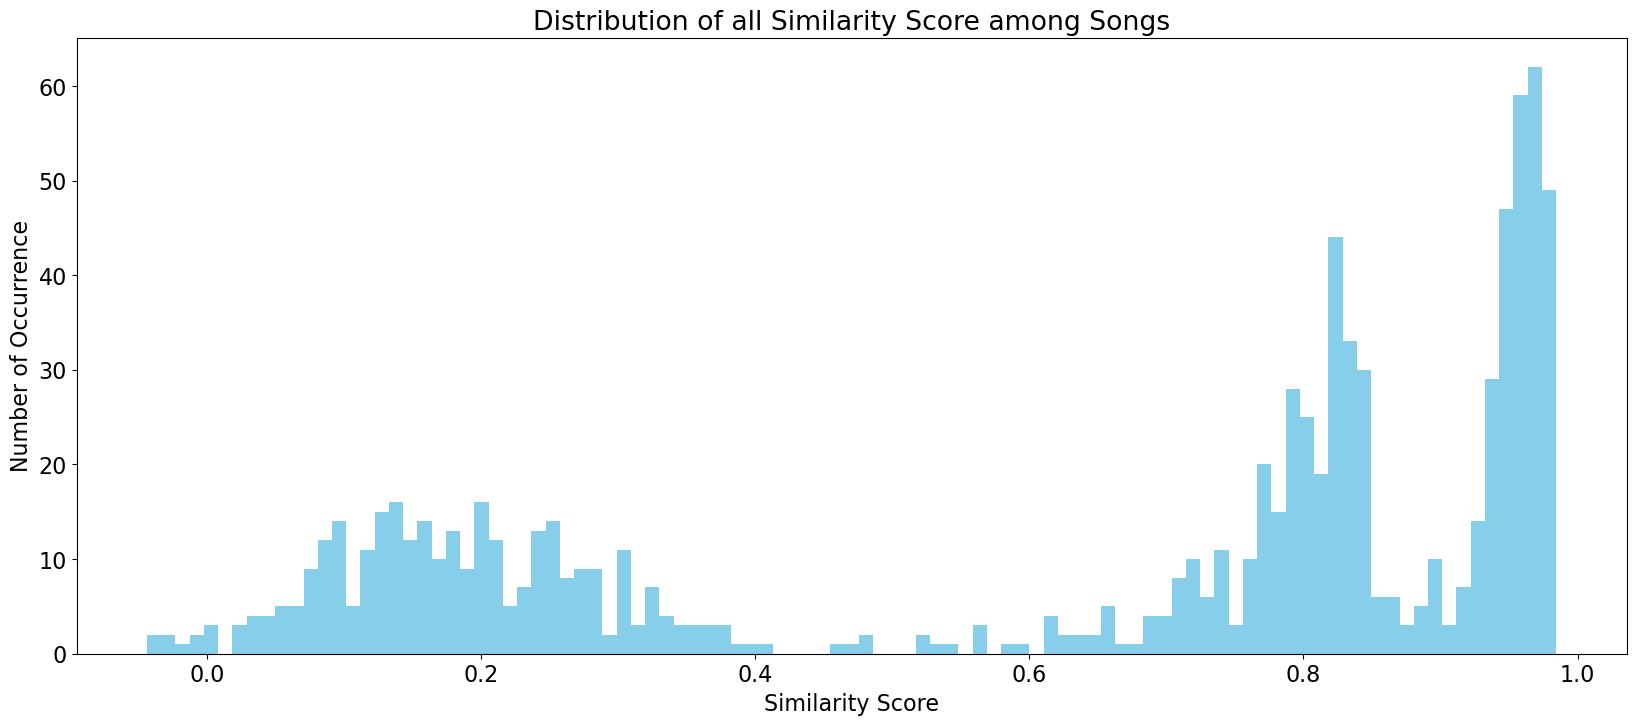

In [95]:
all_sc = list(chain(mins,maxs,avgs))

bins = np.linspace(min(all_sc), max(all_sc), 100)
plt.figure(figsize = (20, 8))
plt.rc('font', size=16)
plt.hist(all_sc, bins, color='skyblue')
plt.title('Distribution of all Similarity Score among Songs')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Occurrence')
plt.show()

As a result shown above, we can tell that the peak of similarly is closing to 1, which means that many k-pop song are similar to others. We also have some outliners that have negative similarity. Good job, outliners, for the originality!

In order to have a better look at the peak(0.95-1.), we will make a graph with the data.
The song lyrics from Melon(national-wise), will be marked as red, Spotify(international-wise) blue and the overlapped ones purple.

In [10]:
df = pd.read_csv('/Users/xy/Desktop/all_v6.csv', engine='python')
df.drop(columns=['Unnamed: 0'], inplace=True)

100%|██████████| 100/100 [00:00<00:00, 544.60it/s]


BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


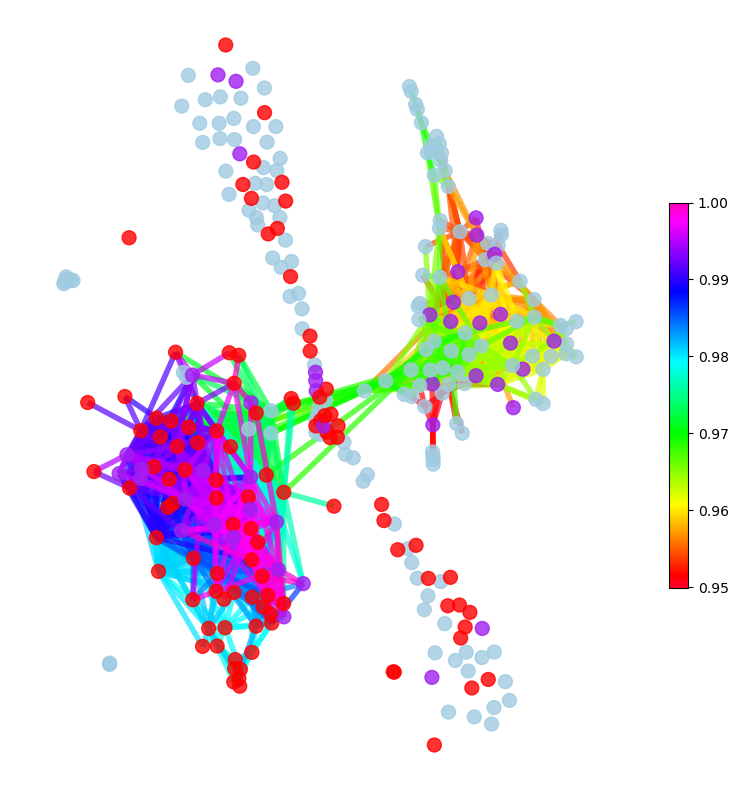

In [20]:
fig = plt.figure(figsize=(10,10), dpi=100)
G   = nx.Graph()
node_cmap = []
purple, red, blue = '#A020F0', '#ff0000', '#A0CBE2'

for idx,i in enumerate(df['similarity']):
    source = df.at[idx,'source']
    if source == 0:
        node_cmap.append(blue)
    elif source == 1:
        node_cmap.append(red)
    elif source == 2:
        node_cmap.append(purple)
    for iidx,sc in enumerate(i):
        if sc > .95:
            G.add_edge(idx, iidx)

G.remove_edges_from(nx.selfloop_edges(G))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False, # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=.05,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=5.0,

                        # Log
                        verbose=True)

pos       = nx.fruchterman_reingold_layout(G, k=1/100, scale=.5, weight=.05)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos, iterations=100)

sm = plt.cm.ScalarMappable(cmap=plt.cm.gist_rainbow, norm=plt.Normalize(vmin=.95, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, shrink=0.5)

nx.draw_networkx_nodes(G, positions, node_size=100, node_color=node_cmap, alpha=.8)
nx.draw_networkx_edges(G, positions, edge_color=range(G.number_of_edges()), 
                        edge_cmap=plt.cm.gist_rainbow, alpha=.7, width=4)
plt.axis('off')
plt.show()

**Section discussion:** We can see that there are two clusters, one mainly formed by reds and the other one blues, the edges connect them, are more green (with .97 similarity). Rather than the inner edges in red cluster are more purple and blue (between .98-1.), whereas the inner edges in blue cluster are more yellow and red (between .95- .96). We can say, it is possible that the top song lyrics from Melon have lower similarity while comparing to the tops in Spotify. Or it could just be, that the international top k-pop song lyrics, which are mostly translated by machine, are more recognizable for our chosen spacy similarity package, unlike the other fans-translated k-pop top song lyrics, which might vary from different vocabularies and structures.

## V. Sentiment Analysis
One of the hypothesises that led us to this project is that people will unconsciously like sad songs better, even they don't know the lyrics. Hopefully we can testify it in this small scale data set.

In [10]:
# get the data set from source
sen = 'https://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001'
df_sen = pd.read_csv(sen, sep='\t', header = 2, 
                        usecols=['word', 'happiness_average'],
                        engine='python')

# a dict for the sentiment score 
# every item in form of k,v: (word, score) 
senDict = {df_sen.at[i,'word']: float(df_sen.at[i,'happiness_average']) 
                for i in range(df_sen.shape[0])}

In [11]:
# clear up function for the content
# returns only tokens NOT in stopwords
def clear_up(content):
    try:
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        wordsOnly = tokenizer.tokenize(content)
        tokens    = [w for w in wordsOnly if not w.lower() 
                        in stopwords.words('english')]
    except:
        tokens    = []
    return tokens

# shorten function for lemmation
# can only handle one word at a time
# it will "purify" the tokens
lemmatizer = nltk.wordnet.WordNetLemmatizer()
lemma      = lemmatizer.lemmatize

In [12]:
# transforming lyrics into clean tokens
df['tokens'] = df.lyrics.apply(clear_up) 
df['tokens'] = df.tokens.apply(lambda x: [lemma(i) for i in x])

# keep only the tokens with score
# and have frequencies of them
df['tokens'] = df.tokens.apply(lambda x: list(set(x) & set(senDict.keys())))
df['tf']     = df.tokens.apply(FreqDist)

# mark the length of tf list for later calculation
# have sentiment set with both values and tokens
# recalculate the sentiment after total score is in
df['numOftf']   = df.tf.apply(len)
df['sentiment'] = df.tf.apply(lambda x: {k: senDict[k]*v for k,v in x.items()})
df['totalSentiment'] = df.sentiment.apply(lambda x: sum(x.values()))
df['sentiment']      = df['totalSentiment']/df['numOftf']

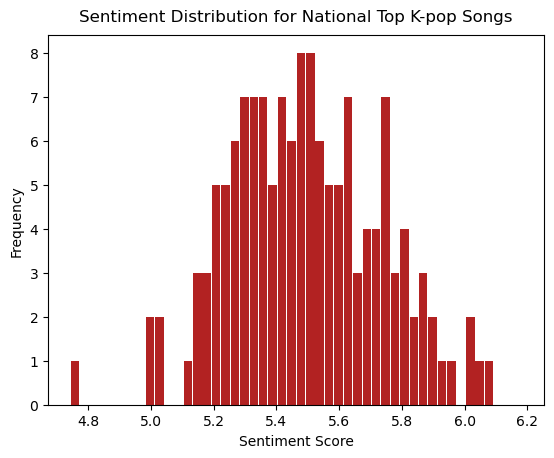

In [20]:
nat_only_song = df.song[df.source.isin([1,2])]
nat_only_seti = df.sentiment[df.source.isin([1,2])]

dist = dict(zip(list(nat_only_song), list(nat_only_seti)))
v    = np.arange(min(nat_only_seti), max(nat_only_seti), step=.03)

# plotting
plt.hist(dist.values(), v, color='firebrick', rwidth=.9)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution for National Top K-pop Songs', pad=10.0)
plt.show()

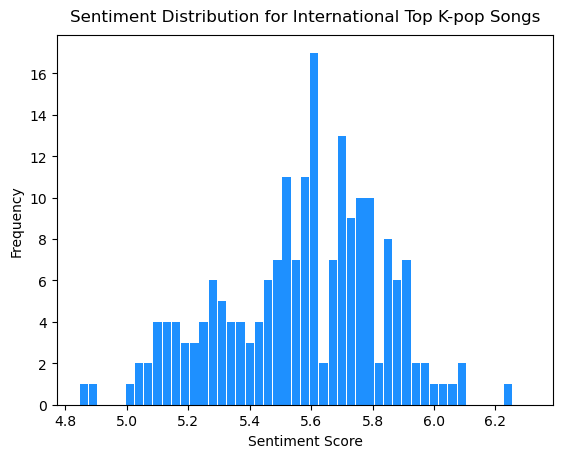

In [34]:
internat_only_song = df.song[df.source.isin([0,2])]
internat_only_seti = df.sentiment[df.source.isin([0,2])]

dist = dict(zip(list(internat_only_song), list(internat_only_seti)))
v    = np.arange(min(internat_only_seti), max(internat_only_seti), step=.03)

# plotting
plt.hist(dist.values(), v, color='dodgerblue', rwidth=.9)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution for International Top K-pop Songs', pad=10.0)
plt.show()

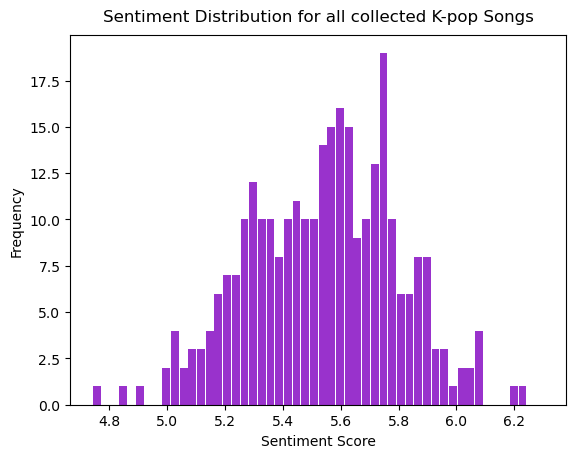

In [22]:
dist = dict(zip(list(df.song.values), list(df.sentiment.values)))
v    = np.arange(min(df.sentiment), max(df.sentiment), step=.03)

# plotting
plt.hist(dist.values(), v, color='darkorchid', rwidth=.9)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution for all collected K-pop Songs', pad=10.0)
plt.show()

In [31]:
def stats(seti_score):
    avg = np.mean(seti_score)
    ten = np.nanpercentile(seti_score, 10)
    nit = np.nanpercentile(seti_score, 90)
    return avg, ten, nit

print('|','avg'.center(10),'|','10 percentile'.center(10),'|',
        '90 percentile'.center(10),'|')
for i in [internat_only_seti, nat_only_seti, df.sentiment]:
    print('|', str(round(stats(i)[0],4)).center(10),'|',
            str(round(stats(i)[1],4)).center(13),'|',
            str(round(stats(i)[2],4)).center(13),'|')

|    avg     | 10 percentile | 90 percentile |
|   5.5719   |     5.1899    |     5.8838    |
|   5.4992   |     5.2099    |     5.8103    |
|   5.5441   |     5.2142    |     5.8656    |


**Section discussion:** given the distributions and stats above, we can say that the songs from national chart have lower sentiment score then the ones from international chart, which could mean that people in Korea is more likely to listen to sad K-pop songs.

## VI. A bit taste of the lyrics
We talked about gathering lyrics and analyzing lyrics all this and that, but what exactly is in the lyrics? Let us find out in this section.

In [202]:
group_list = df.group.unique()
cloud_list = []
colmap = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

for idx,i in enumerate(group_list):
    collection = df.lyrics[df.group.isin([i])].to_string()
    collection = lemma(collection)
    wordcloud  = WordCloud(max_font_size=100, max_words=180,
                            width=1600, height=800,
                            colormap=random.choice(colmap),
                            stopwords=stopwords.words('english'),
                            background_color="whitesmoke").generate(collection)
    cloud_list.append(wordcloud)

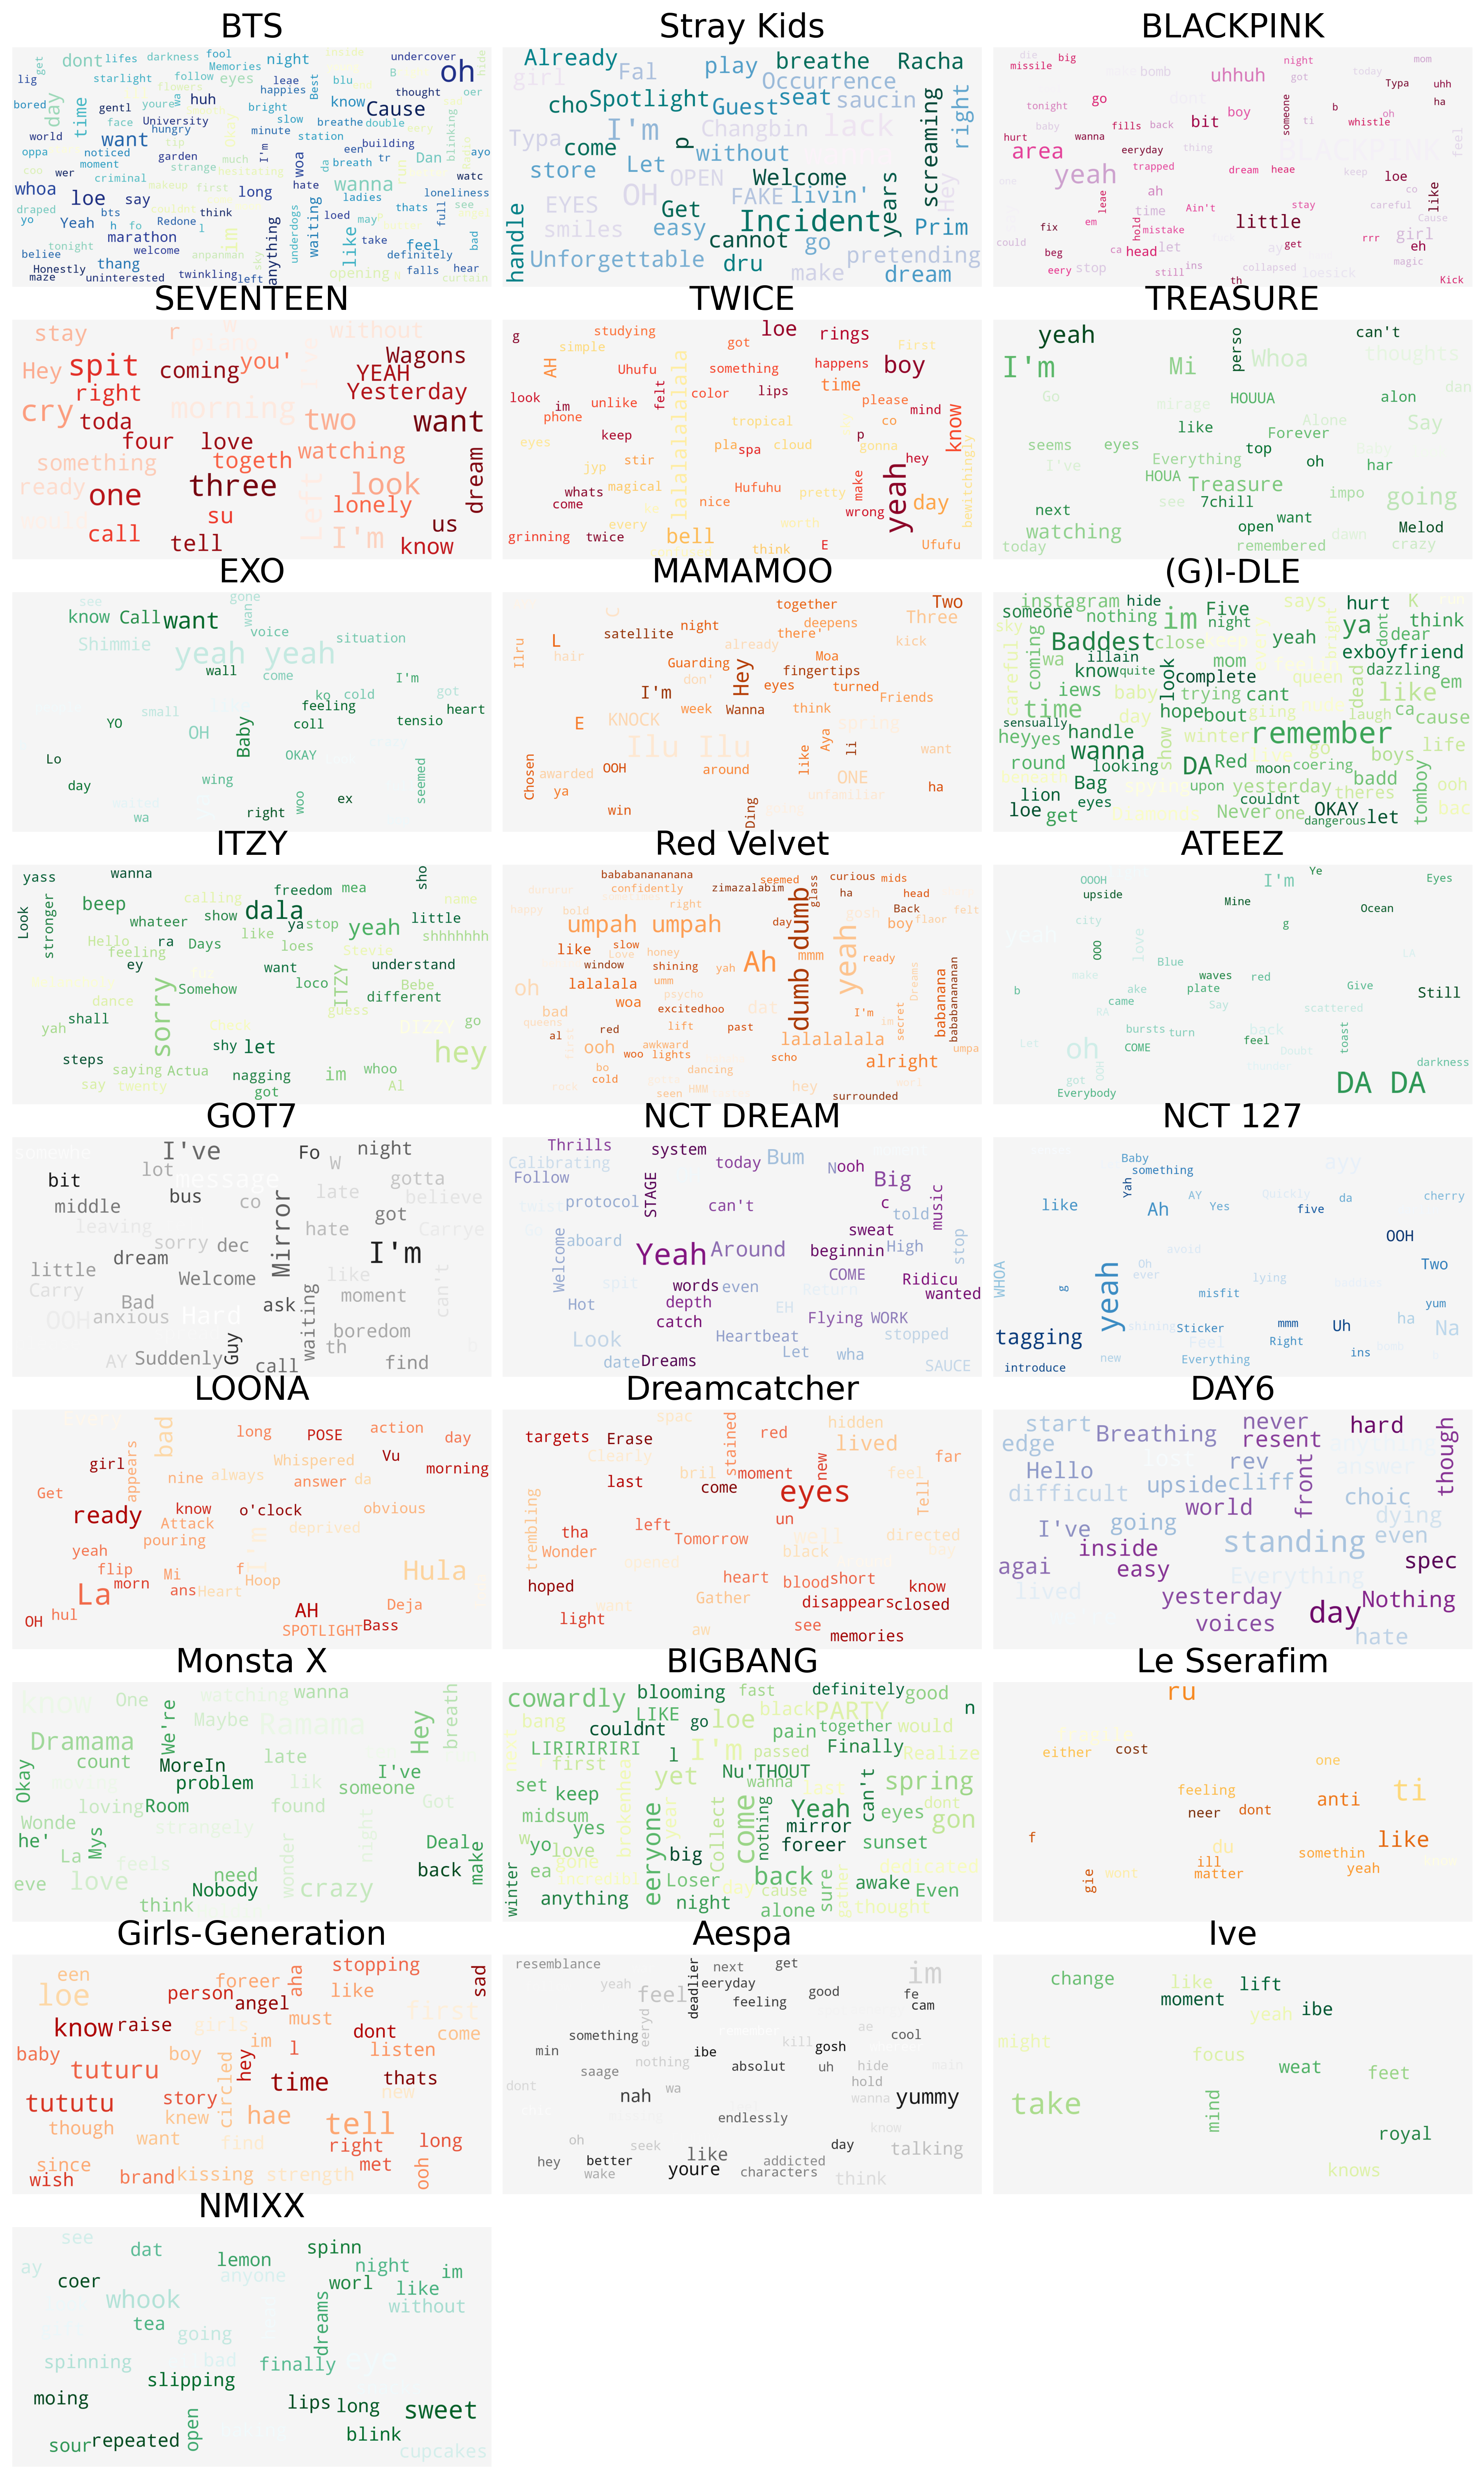

In [209]:
fig = plt.figure(figsize=(20, 12), dpi=300)
for idx, cloud in enumerate(cloud_list):
    fig.add_subplot(9, 3, idx+1)
    fig.set_figheight(20)
    fig.set_figwidth(12)
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(group_list[idx])

plt.tight_layout(pad=.3)
plt.show()

**Section discussion:** from the word clouds above, we can see many group haven't filled out their canvas, which means they don't have that many key works, whereas the maximum of word is set to 180 here. This could happen due to two reasons: 1) the content of the lyrics are high reduplicated, 2) the lyrics lose their essentials after translation. On the other hand, we could still see some of the big names in K-pop filled their canvas nice and fully. This could also nail down to two important factor: 1) they are on both chart, national and international, hence a bigger song selection; 2) they tend to have more English song, hence more recognizable vocabulary for the English trained language model.

Here is the end of this project, if you want to find out more information for **Melon Data**, you can click [this link](https://dtudk.sharepoint.com/:u:/s/socialgraph22/EcYf0yuPfLFMhsiEkxsw_UcBQ3Wy-NExx0KFhfD_s3HnVQ?e=qhu86G), or **Spotify Data** at [this link](https://dtudk.sharepoint.com/:u:/s/socialgraph22/ETI609MPF8xCm9mGNy8MRI0Bd2m4I9K_f92_0Xg-CbEeVg?e=Gh2FHC).